###Aula 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
dados = pd.read_csv( 'https://raw.githubusercontent.com/Trabalhinho/FIAP_Modulo_2/main/Base_de_dados/data.csv', sep = ',' )
dados.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


###Aula 2

<ipython-input-7-b4ac0b61f8c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dados.corr().round(2)


<Axes: >

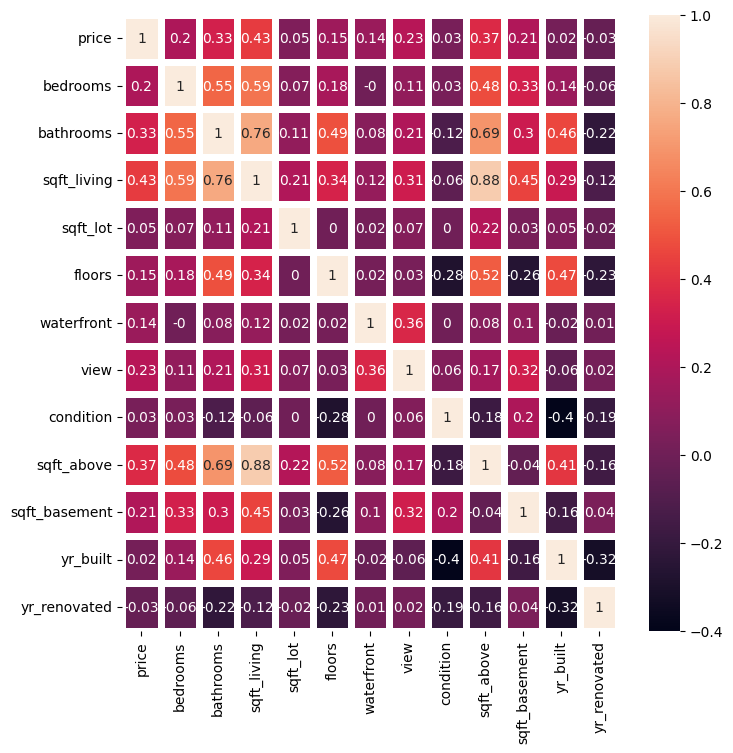

In [ ]:
correlation_matrix = dados.corr().round(2)

fig, axes = plt.subplots( figsize = (8,8) )

sns.heatmap( data = correlation_matrix, annot = True, linewidth = 5, ax = axes )

In [ ]:
x = dados[ ['sqft_living', 'bathrooms'] ].values
y = dados['price'].values

<Axes: xlabel='sqft_living', ylabel='price'>

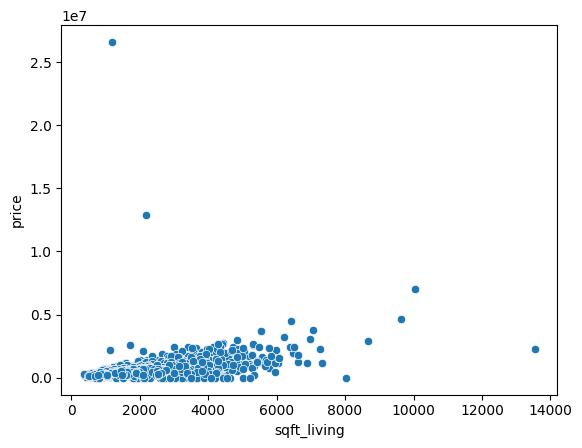

In [ ]:
sns.scatterplot( data = dados, x = 'sqft_living', y = 'price' )

<Axes: xlabel='bathrooms', ylabel='price'>

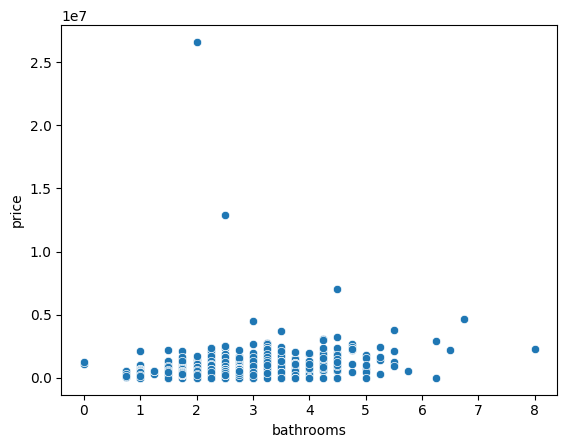

In [ ]:
sns.scatterplot( data = dados, x = 'bathrooms', y = 'price' )

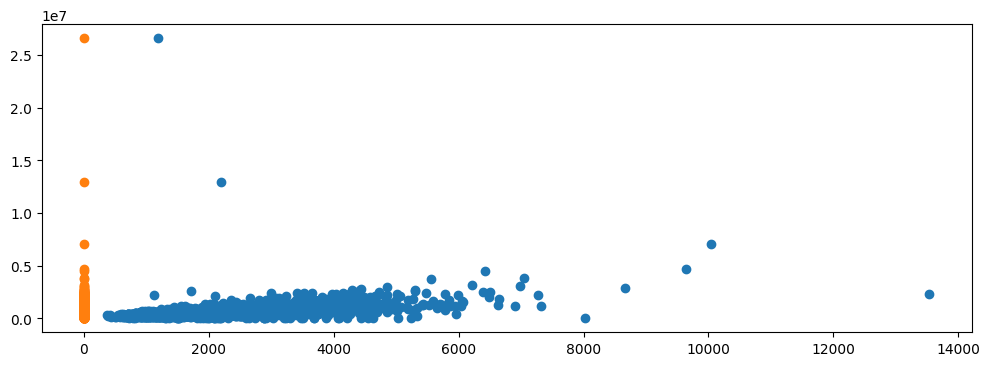

In [ ]:
fig, ax = plt.subplots( figsize = (12,4))

ax.scatter( x[:,0], y);
ax.scatter( x[:,1], y);

<Axes: xlabel='sqft_living', ylabel='Count'>

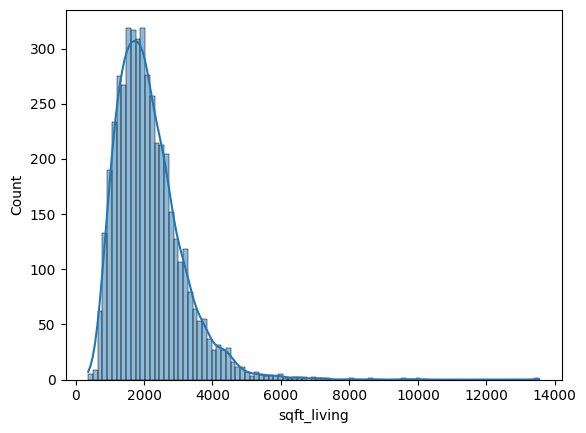

In [ ]:
sns.histplot( data = dados, x = 'sqft_living', kde = True )

<Axes: xlabel='bathrooms', ylabel='Count'>

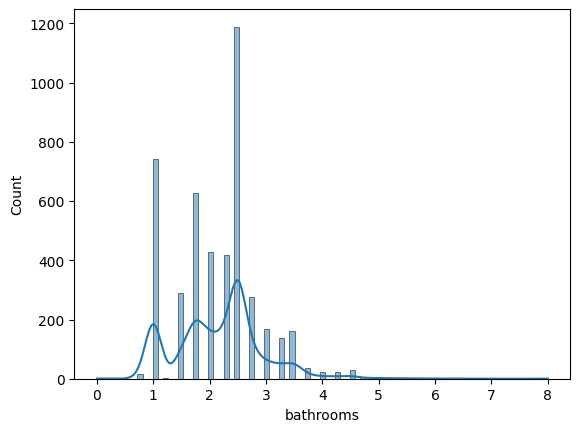

In [ ]:
sns.histplot( data = dados, x = 'bathrooms', kde = True )

<Axes: >

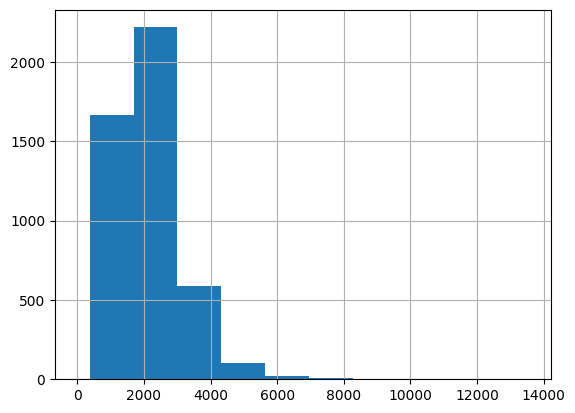

In [ ]:
hist_variaveis = pd.DataFrame( dados, columns = [ 'sqft_living', 'bathrooms' ] )
hist_variaveis.sqft_living.hist()
hist_variaveis.bathrooms.hist()

###Aula 3

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Padronização

scaler = StandardScaler()

x_std = scaler.fit_transform(x)

In [ ]:
x_std

array([[-0.82997105, -0.84320364],
       [ 1.56852826,  0.43280154],
       [-0.21736733, -0.20520105],
       ...,
       [ 0.90400897,  0.43280154],
       [-0.05123751, -0.20520105],
       [-0.67422434,  0.43280154]])

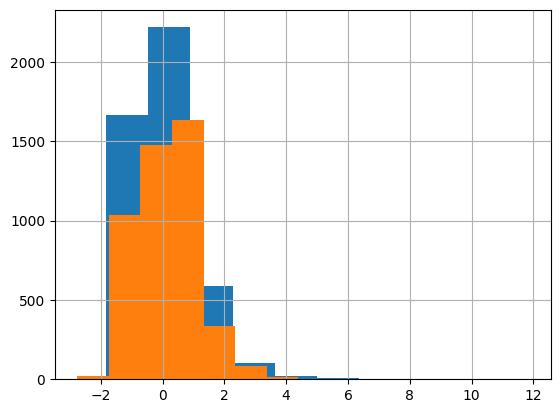

In [ ]:
x_std = pd.DataFrame( x_std, columns = ['sqtf_living', 'bathrooms'] )
x_std.sqtf_living.hist();
x_std.bathrooms.hist();

###Aula 4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
x = dados[ ['sqft_living', 'bathrooms'] ].values
y = dados['price'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 7 )

In [ ]:
len(x_train)

3450

In [ ]:
len(x_test)

1150

In [ ]:
x_train

array([[2.400e+03, 3.250e+00],
       [1.954e+03, 2.500e+00],
       [2.620e+03, 2.750e+00],
       ...,
       [3.490e+03, 3.750e+00],
       [2.380e+03, 2.500e+00],
       [1.790e+03, 2.500e+00]])

In [ ]:
scaler = MinMaxScaler()

scaler.fit( x_train )

MinMaxScaler()

In [ ]:
x_train_scaled = scaler.transform( x_train )
x_test_scaled = scaler.transform( x_test )

In [ ]:
x_train_scaled

array([[0.15349544, 0.40625   ],
       [0.11960486, 0.3125    ],
       [0.17021277, 0.34375   ],
       ...,
       [0.23632219, 0.46875   ],
       [0.15197568, 0.3125    ],
       [0.10714286, 0.3125    ]])

In [ ]:
model = LinearRegression()

model.fit( x_train_scaled, y_train )

LinearRegression()

In [ ]:
y_pred = model.predict( x_test_scaled )

In [ ]:
MAE = mean_absolute_error( y_test, y_pred )
r2 = r2_score( y_test, y_pred )

print( 'MAE: ', MAE )
print( 'r2:', r2 )

MAE:  173536.74188212887
r2: 0.460589559677016


In [ ]:
model_normal = LinearRegression()

model_normal.fit( x_train, y_train )

LinearRegression()

In [ ]:
y_pred_normal = model_normal.predict(x_test)

In [ ]:
MAE = mean_absolute_error( y_test, y_pred_normal )
r2 = r2_score( y_test, y_pred_normal )

print( 'MAE: ', MAE )
print( 'r2:', r2 )

MAE:  173536.74188212893
r2: 0.4605895596770161
